## Preprocessing

In [116]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
import matplotlib.pyplot as plt
import seaborn as sns

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [117]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
updated_data = application_df.drop(["EIN", "NAME"], axis=1)

In [118]:
# Get the number of rows in the date (data size)
num_rows = updated_data.shape[0]

# Print the result
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 34299


In [119]:
# Check for missing values in the 'updated_data' DataFrame
missing_values = updated_data.isnull().sum()

# Display the result
print(missing_values)

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64


In [120]:
# Determine the number of unique values in each column.
unique_values = updated_data.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [121]:
# Check how proportionally data distributed in 'ASK_AMT' column (to chech how balanced our data)
amount_type_counts = updated_data['ASK_AMT'].value_counts()
# Display the results
print(amount_type_counts)

ASK_AMT
5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: count, Length: 8747, dtype: int64


In [122]:
# Sort the value count  in 'ASK_AMT' column starting from the highest value count
top_10_amounts = amount_type_counts.sort_values(ascending=False).head(10)
# Display the results
print(top_10_amounts)

ASK_AMT
5000     25398
15583        3
63981        3
6725         3
10478        3
34538        2
73627        2
32807        2
16200        2
12238        2
Name: count, dtype: int64


In [123]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = updated_data['APPLICATION_TYPE'].value_counts()
# Display the results
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [124]:
# Choose a cutoff value (threshold of 500 and less) and create a list of application types to be replaced
threshold = 500
# Create a list of application types to be replaced with "Other" with a variable name `application_types_to_replace`
application_types_to_replace = application_type_counts[application_type_counts < threshold].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    updated_data['APPLICATION_TYPE'] = updated_data['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
updated_data['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [125]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_type_counts = updated_data['CLASSIFICATION'].value_counts()
# Display the counts and the length of unique values
print(classification_type_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [126]:
# You may find it helpful to look at CLASSIFICATION value counts >1

# Filter the value counts to show only classifications that appear more than once
classification_type_counts_filtered = classification_type_counts[classification_type_counts > 1]

# Display the filtered counts
print(classification_type_counts_filtered)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [127]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_type_counts[classification_type_counts < 1882].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    updated_data['CLASSIFICATION'] = updated_data['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
updated_data['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [128]:
# Convert categorical data to numeric with `pd.get_dummies`
updated_data_encoded = pd.get_dummies(updated_data, columns=[
    'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'
])
# Display sample data
updated_data_encoded.head(5)

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,108590,1,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,5000,0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6692,1,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,142590,1,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [129]:
# Split our preprocessed data into our features and target arrays
X = updated_data_encoded.drop('IS_SUCCESSFUL', axis=1)
y = updated_data_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=25)

In [130]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler and transform 'ASK_AMT' as the only numberic value
X_train['ASK_AMT'] = scaler.fit_transform(X_train[['ASK_AMT']])

# Apply the same transformation to the 'ASK_AMT' column in the testing data
X_test['ASK_AMT'] = scaler.transform(X_test[['ASK_AMT']])

## Compile, Train and Evaluate the Model

In [131]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_dim = X_train.shape[1]  # Number of input features (from the training data)

# Initialize the sequential model
nn = tf.keras.models.Sequential()

# First Dense layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_dim))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 80)                  │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,061 (23.68 KB)

 Trainable params: 6,061 (23.68 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [133]:
# Train the model
fit_nn = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7012 - loss: 0.5970
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7291 - loss: 0.5587
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7318 - loss: 0.5488
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7316 - loss: 0.5527
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7384 - loss: 0.5455
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7329 - loss: 0.5478
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7375 - loss: 0.5409
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7390 - loss: 0.5425
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7343 - loss: 0.5476
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7375 - loss: 0.5400
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7367 - loss: 0.5426
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [134]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 3ms/step - accuracy: 0.7245 - loss: 0.5772
Loss: 0.5771980881690979, Accuracy: 0.7245481014251709


In [135]:
# Export our model to HDF5 file
nn.save("my_model.h5")
# Export the model to a .keras file
nn.save("my_model.keras")

In [136]:
# CHANGE THE NUMBER OF LAYERS & use LeakyRelu in an attempt to increase of the accuracy of the model:

In [137]:
# Initialize the sequential model
nn_4 = tf.keras.models.Sequential()

# First layer with 128 units
nn_4.add(Dense(units=128, input_dim=input_dim))
nn_4.add(LeakyReLU(alpha=0.01))  # Adding Leaky ReLU activation

# Second hidden layer with 64 units
nn_4.add(Dense(units=64))
nn_4.add(LeakyReLU(alpha=0.01))

# Third hidden layer with 32 units
nn_4.add(Dense(units=32))
nn_4.add(LeakyReLU(alpha=0.01))

# Fourth hidden layer with 16 units
nn_4.add(Dense(units=16))
nn_4.add(LeakyReLU(alpha=0.01))

# Output layer (for binary classification)
nn_4.add(Dense(units=1, activation='sigmoid'))

# Compile the model adjusting learning rate to improve accuracy
nn_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Check the structure of the model
nn_4.summary()

# Train the model & check accuracy rate change based on the batch size
history = nn_4.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 128)                 │           5,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


636/644 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4684 - loss: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


644/644 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4683 - loss: 0.0000e+00 - val_accuracy: 0.4715 - val_loss: 0.0000e+00
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4699 - loss: 0.0000e+00 - val_accuracy: 0.4715 - val_loss: 0.0000e+00
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4690 - loss: 0.0000e+00 - val_accuracy: 0.4715 - val_loss: 0.0000e+00
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4663 - loss: 0.0000e+00 - val_accuracy: 0.4715 - val_loss: 0.0000e+00
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4695 - loss: 0.0000e+00 - val_accuracy: 0.4715 - val_loss: 0.0000e+00
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4704 - loss: 0.0000e+00 - val_accuracy: 0.4715 - val_loss: 0.0000e+00
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4667 - loss: 0.0000e+00 - val_accuracy: 0.4715 - val_loss: 0.0000e+00
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step 

In [138]:
# Evaluate the model on test data
loss, accuracy = nn_4.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4601 - loss: 0.0000e+00
Test Accuracy: 0.46472


In [139]:
# SWITCH TO RANDOM FOREST MODEL to check if that increases accuracy

In [140]:
# Drop selected features
features_to_drop = [
    'APPLICATION_TYPE_Other',
    'APPLICATION_TYPE_T19',
    'INCOME_AMT_50M+',
    'SPECIAL_CONSIDERATIONS_Y'
]

# Drop the features from the dataset
updated_data_encoded_dropped = updated_data_encoded.drop(columns=features_to_drop)

In [141]:
# Split the preprocessed data into features (X) and target (y)
X = updated_data_encoded_dropped.drop('IS_SUCCESSFUL', axis=1)
y = updated_data_encoded_dropped['IS_SUCCESSFUL']

In [142]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [143]:
# Scale 'ASK_AMT' only
scaler = StandardScaler()

In [144]:
# Fit and transform the training data
X_train['ASK_AMT'] = scaler.fit_transform(X_train[['ASK_AMT']])
# Apply the same transformation to the test data
X_test['ASK_AMT'] = scaler.transform(X_test[['ASK_AMT']])

In [145]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=25)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=25)

In [146]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [147]:
# Evaluate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.5f}")

Test Accuracy: 0.70577


In [148]:
# Feature Importance using RandomForest (for comparison or feature analysis)
feature_importances = model.feature_importances_

# Get feature names from X.columns
feature_names = X.columns

# Create a DataFrame to visualize feature importances
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the 10 most important features
print(feature_importances_df.head(10))

                         Feature  Importance
0                        ASK_AMT    0.402119
8   AFFILIATION_CompanySponsored    0.150472
10       AFFILIATION_Independent    0.108434
4            APPLICATION_TYPE_T5    0.029576
1           APPLICATION_TYPE_T10    0.029519
25      ORGANIZATION_Association    0.027801
28            ORGANIZATION_Trust    0.024072
17          CLASSIFICATION_C2100    0.019541
19          CLASSIFICATION_Other    0.018875
16          CLASSIFICATION_C2000    0.017367


<ipython-input-149-de153c55e39c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


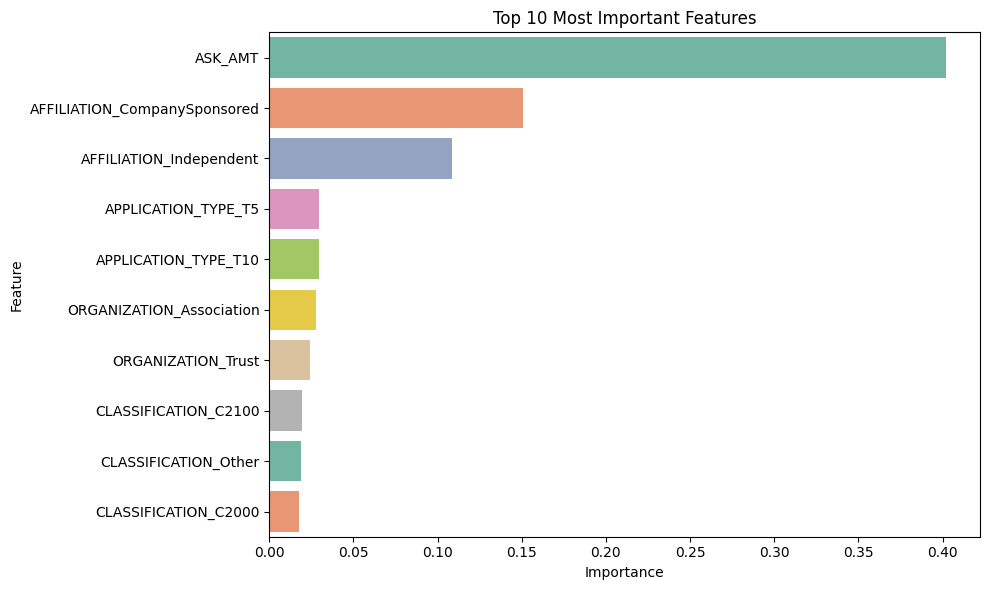

In [149]:
# Select the top 10 most important features
top_10_features = feature_importances_df.head(10)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a barplot using Seaborn, with different colors for each bar
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_10_features,
    palette='Set2'  # You can choose a different color palette if you prefer
)

# Add plot title and labels
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.tight_layout()
plt.show()

In [154]:
# Create a new data frame to run Random forest with the 3 most imprtant features only
enhanced_data = updated_data_encoded_dropped.copy()

# Drop the features from the dataset
enhanced_data = enhanced_data[['ASK_AMT', 'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent', 'IS_SUCCESSFUL']]

# Split the preprocessed data into features (X) and target (y)
X = enhanced_data.drop('IS_SUCCESSFUL', axis=1)
y = enhanced_data['IS_SUCCESSFUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Scale 'ASK_AMT' only
new_scaler = StandardScaler()

# Fit and transform the training data
X_train['ASK_AMT'] = new_scaler.fit_transform(X_train[['ASK_AMT']])
# Apply the same transformation to the test data
X_test['ASK_AMT'] = new_scaler.transform(X_test[['ASK_AMT']])

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=25)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
new_accuracy = model.score(X_test, y_test)
print(f"Accuracy: {new_accuracy:.5f}")


Accuracy: 0.66210


In [155]:
# Functional API model data to find a model with the highest accuracy

In [156]:
# Split the preprocessed data into features and target arrays using reduced data (dropped low-influence columns)
X = updated_data_encoded_dropped.drop('IS_SUCCESSFUL', axis=1)
y = updated_data_encoded_dropped['IS_SUCCESSFUL']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [157]:
# Scale 'ASK_AMT' column only
scaler = StandardScaler()
X_train['ASK_AMT'] = scaler.fit_transform(X_train[['ASK_AMT']])
X_test['ASK_AMT'] = scaler.transform(X_test[['ASK_AMT']])

In [158]:
# Define the model using the Functional API
# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# First hidden layer
x = Dense(units=128, activation='relu')(input_layer)
x = Dropout(0.3)(x)  # Adding dropout to prevent overfitting

# Second hidden layer
x = Dense(units=64, activation='relu')(x)
x = Dropout(0.3)(x)

# Third hidden layer (Optional)
x = Dense(units=32, activation='relu')(x)

# Output layer
output_layer = Dense(units=1, activation='sigmoid')(x)

# Define the full model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
# Train the model, set to 50 epochs for speed
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6733 - loss: 0.6203 - val_accuracy: 0.7335 - val_loss: 0.5559
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7244 - loss: 0.5684 - val_accuracy: 0.7378 - val_loss: 0.5504
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7310 - loss: 0.5599 - val_accuracy: 0.7380 - val_loss: 0.5492
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7356 - loss: 0.5585 - val_accuracy: 0.7370 - val_loss: 0.5502
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7301 - loss: 0.5563 - val_accuracy: 0.7390 - val_loss: 0.5453
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7307 - loss: 0.5540 - val_accuracy: 0.7382 - val_loss: 0.5485
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7354 - loss: 0.5523 - val_accuracy: 0.7390 - val_loss: 0.5459
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7343 - loss: 0.5513 - val_accuracy: 0.

In [160]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7277 - loss: 0.5546
Test Accuracy: 0.72373
